# 1. Introduction
Noon is a large online marketplace in the Middle East, and this dataset shows the scent notes of perfume in different brands. Since perfume is a product category that has a high profit margin in this region. Looking into the data to understand the trend or the popular scents of perfurme would be beneficial to create a next product

# 2. Objectives
In order to get the general idea of the market, drawing out the charts would help easily understand the current situation. Thus, here comes the quetions that this report woudl like to answer.

What kinds of perfume provide the highest discount that may encourage customers to purchase?
Any correlation between the price and the review stars?
What scent notes are usually used in diffent sexual categorie?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("noon_perfumes_dataset.csv",index_col=[0])

In [5]:
data.sample(5)

,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,middle_note,item_rating,seller,seller_rating,num_seller_ratings
316,Michael Kors,kors,419.00,273.00,100,EDP,Women,Floral,"Musk, Cashmere Wood, Vetiver","Tuberose, Iris, Peony, Orris Root, Arum Lily",5.0,Beautiful Live,4.2,7
275,Calvin Klein,Euphoria,268.00,127.25,100,EDP,Men,Woody,"Black Violet, Liquid Amber, Mahogany, Cream Ac...","Black Orchid, Champaca Flower",4.8,King-Perfume,3.6,450
640,DORALL COLLECTION,Lady Dorall,14.75,14.75,100,EDT,Women,Spicy,"Apricot, amber, lemon tree","Lily, jasmine, rose",4.0,Princess of beauty,3.8,467
301,VERSACE,Oud Noir,500.00,260.00,100,EDP,Men,Woody,"Agarwood, Patchouli, Leatherwood","Cardamom, Saffron, Olibanum",4.5,Lady Style,4.2,124
253,LALIQUE,Encre Noire,140.00,136.00,100,EDT,Men,Woody,"Musk, Cashmere Wood",Haitian and Bourbon Vetiver,4.5,Abu Al Tayyeb Perfumes,3.6,76


In [6]:
data.shape

(1003, 14)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1002
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brand               1003 non-null   object 
 1   name                1003 non-null   object 
 2   old_price           1003 non-null   float64
 3   new_price           1003 non-null   float64
 4   ml                  1003 non-null   int64  
 5   concentration       1003 non-null   object 
 6   department          1003 non-null   object 
 7   scents              1003 non-null   object 
 8   base_note           1003 non-null   object 
 9   middle_note         1003 non-null   object 
 10  item_rating         1003 non-null   float64
 11  seller              1003 non-null   object 
 12  seller_rating       1003 non-null   float64
 13  num_seller_ratings  1003 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 117.5+ KB


In [11]:
data.duplicated().sum()

100

In [14]:
data=data.drop_duplicates()

In [15]:
data.shape

(903, 14)

In [16]:
brand_list=[]
brands=[brand_list.append(x) for x in data['brand'] if x not in brand_list]
print(len(brand_list))
print(brand_list)

160
['PACO RABANNE', 'Roberto Cavalli', 'S.T.Dupont', 'GUESS', 'HUGO BOSS', 'DORALL COLLECTION', 'GUCCI', 'Yves Saint Laurent', 'CERRUTI 1881', 'Calvin Klein', 'Rasasi', 'MONTALE', 'CHLOE', 'NARCISO RODRIGUEZ', 'BOUCHERON', 'Alina Corel', 'Revlon', 'TED LAPIDUS', 'Britney Spears', 'Van Cleef & Arpels', 'Estee Lauder', 'Geoffrey Beene', 'Dolce & Gabbana', 'Mancera', 'Dior', 'BURBERRY', 'AIGNER', 'BENTLEY', 'VERSACE', 'Juicy Couture', 'Laura Mars', 'GIORGIO ARMANI', 'HERMES', 'Elizabeth Arden', 'Benetton', 'Giorgio Beverly Hills', 'Guerlain', 'Jean Paul GAULTIER', 'Ajmal', 'J.CASANOVA', 'UNITED COLORS OF BENETTON', 'YSL', 'TOMMY HILFIGER', 'RALPH LAUREN', 'EMPORIO ARMANI', 'armani', 'VALENTINO', 'Ard Al Zaafaran', 'DKNY', 'CAROLINA HERRERA', 'ELIE SAAB', 'MONTBLANC', 'LACOSTE', 'LE CHAMEAU', 'AVON', 'Salvatore Ferragamo', 'Carrera', 'Sedr Al-Khaleej Perfumes', 'Dunhill', 'TRUSSARDI', 'Dupont', 'ANGEL SCHLESSER', 'DAVIDOFF', 'CHOPARD', 'CARTIER', 'jennifer lopez', 'BVLGARI', 'Ferrari', 'A

In [17]:
scent_list=[]
scents=[scent_list.append(x) for x in data['scents'] if x not in scent_list]
print(len(scent_list))
print(scent_list)

22
['Woody', 'Floral', 'Arabian', 'Spicy', 'Oriental', 'Fruity', 'Fresh', 'Citrus', 'Vanilla', 'Musk', 'Oriental, Floral', 'Sweet Aromatic', 'Aromatic', 'Woody, Sweet', 'Aromatic,Citrus', 'Clean', 'Woody, Musky', 'Floral and Oriental', 'Jasmine', 'Woody And Spicy', 'Rose, Floral', 'Sandalwood']


Add columns for the price deduction, deduction range, and price per ml.

In [18]:
data['price_deduction']=data['old_price']-data['new_price']
data['%_of_deduction']=((data['price_deduction']/data['old_price']).round(4))*100
data['price_per_ml']=(data['new_price']/data['ml']).round(2)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19760\3000432257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_deduction']=data['old_price']-data['new_price']
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19760\3000432257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['%_of_deduction']=((data['price_deduction']/data['old_price']).round(4))*100
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_19760\3000432257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [19]:
data.head()

,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,middle_note,item_rating,seller,seller_rating,num_seller_ratings,price_deduction,%_of_deduction,price_per_ml
0,PACO RABANNE,1 Million Lucky,395.0,244.55,100,EDT,Men,Woody,"Oakmoss, Patchouli and Vetiver","Hazelnut, Jasmine, Cashmir Wood, Cedar and Honey",5.0,noon,4.2,98.1K,150.45,38.09,2.45
1,Roberto Cavalli,Paradiso Assoluto,415.0,107.95,50,EDP,Women,Floral,"Vanilla, Sandalwood And Patchouli",Wild Jasmine and Red Lily,4.8,noon,4.2,98.1K,307.05,73.99,2.16
2,S.T.Dupont,Royal Amber,265.0,186.90,100,EDP,Unisex,Arabian,"Lemon, Mint and Wood Moss",Sandalwood and Cedar,5.0,noon,4.2,98.1K,78.10,29.47,1.87
3,GUESS,Seductive Blue,290.0,103.20,100,EDT,Men,Spicy,"Cashmere Wood, Moss And Rippled Sand Accord",Blue Coral Aquaspace Accord And Geranium,3.0,noon,4.2,98.1K,186.80,64.41,1.03
4,Roberto Cavalli,Uomo,260.0,94.95,50,EDP,Women,Arabian,"Vanille, Benzoin, Tonka Bean",African Orange Flower,4.8,noon,4.2,98.1K,165.05,63.48,1.90


In [20]:
data1=data.copy()

In [22]:
data1.sort_values(by="item_rating",ascending=False)

,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,middle_note,item_rating,seller,seller_rating,num_seller_ratings,price_deduction,%_of_deduction,price_per_ml
0,PACO RABANNE,1 Million Lucky,395.0,244.55,100,EDT,Men,Woody,"Oakmoss, Patchouli and Vetiver","Hazelnut, Jasmine, Cashmir Wood, Cedar and Honey",5.0,noon,4.2,98.1K,150.45,38.09,2.45
329,GIORGIO ARMANI,Si,620.0,232.90,100,EDP,Women,Floral,"Patchouli, Woods, Amber, Orcanox, Vanilla","Rose de Mai, Neroli, Egyptian Jasmine, Freesia",5.0,Number One,4.2,98.1K,387.10,62.44,2.33
323,Calvin Klein,CK IN2U,267.0,82.20,100,EDT,Men,Citrus,"Amber, Red Cader, Vanilla",Cacao Pod,5.0,AMLAQ,3.9,135,184.80,69.21,0.82
322,AZZARO,Chrome,203.0,143.70,100,EDT,Men,Citrus,"Sandalwood, Tonka Bean, Musk, Oakmoss, Cedar, ...","Cyclamen, Coriander, Jasmine And Oakmoss",5.0,AMLAQ,3.9,135,59.30,29.21,1.44
670,armani,Code Absolu ED,8.5,8.50,2,EDP,Men,Floral,"Vanilla, Amber, Musk, and Patchouli","Jasmine, Geranium, Neroli and Ylang-Ylang",5.0,Princess of beauty,3.8,467,0.00,0.00,4.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,CHOPARD,1000 Miglia,275.0,153.30,80,EDT,Men,Woody,"Amber, Woody Notes And Coffee","Violet, Green Grass, Asphalt And Leather",1.0,noon,4.2,98.1K,121.70,44.25,1.92
697,cacharel,Yes I Am ED,15.0,8.90,2,EDT,Women,Jasmine,"Milk, Sandalwood, Cardamom","Ginger Flower, Jasmine, Gardenia",1.0,Royal Scent,3.5,5,6.10,40.67,4.45
536,AZZARO,Visit,310.0,110.00,100,EDT,Men,Woody,"Amber, musk","Labdanum, guaiac wood, incense, cedar",1.0,Star.perfume,3.9,537,200.00,64.52,1.10
305,ADOLFO DOMINGUEZ,Vetiver Hombre,456.0,110.25,120,EDT,Men,Floral,"Amber, Cedar, Leather, Vetiver, Patchouli and ...","Jasmine, Lily and Clove",1.0,Victoria,3.5,30,345.75,75.82,0.92


In [23]:
data1.sort_values(by="new_price",ascending=False)

,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,middle_note,item_rating,seller,seller_rating,num_seller_ratings,price_deduction,%_of_deduction,price_per_ml
191,AMOUAGE,Gold,1376.00,904.85,100,EDP,Women,Woody,"Ambergris, Civet, Musk, Cedar Wood, Sandalwood","Myrrh, Orris, Jasmine",4.4,Parvant Store,3.8,76,471.15,34.24,9.05
525,PENHALIGON'S,Portraits George,2350.00,886.00,75,EDP,Men,Woody,Tonka Beans,Shaving Soap,5.0,Beuatyone1,4.2,1.3K,1464.00,62.30,11.81
564,Parfums De Marly,Delina Exclusive,1696.00,785.00,75,EDP,Women,Woody,"Woody, Amber, Vanilla","Turkish Rose, Incense, Burning Oud",4.0,Golden Perfumesعطر أصلي 100 %,3.6,111,911.00,53.71,10.47
281,AMOUAGE,Interlude,854.00,716.80,100,EDP,Men,Fresh,"Leather, Agarwood Smoke, Patchouli, Sandalwood","Amber, Frankincense, Opoponax, Cistus, Myrrh",4.0,Perfume Ms,4.2,20,137.20,16.07,7.17
217,AMOUAGE,Honour,1607.00,710.95,100,EDP,Women,Spicy,"Patchouli, Cedar, Vetiver, Frankincense, Musk,...","Geranium, Elemi, Nutmeg",5.0,rich&light,3.8,66,896.05,55.76,7.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,DORALL COLLECTION,Love You Like Crazy,25.00,7.25,100,EDT,Women,Woody,"Patchouli, musk, vanilla, amber","Peony, jasmine, lily",4.5,B.A.G,3.7,14.1K,17.75,71.00,0.07
799,LANVIN,Eclat D'arpege,6.85,6.85,2,EDP,Women,Floral,Blackberry And Sensual Musk,"Musk, Chinese Osmanthus, Petitgrain, Cedar, Wi...",3.8,AMLAQ,3.9,135,0.00,0.00,3.42
742,Guerlain,L'Homme Ideal,6.50,6.50,1,EDT,Men,Floral,"Vanilla, Amber, Musk, and Patchouli","Jasmine, Geranium, Neroli and Ylang-Ylang",5.0,Princess of beauty,3.8,467,0.00,0.00,6.50
560,COACH,New York,5.60,5.60,2,EDT,Men,Citrus,"Vetiver, Suede, Ambergris","Cardamom, Coriander, Geranium",4.7,Princess of beauty,3.8,467,0.00,0.00,2.80


In [24]:
# the price of the perfume value in descending order

In [25]:
data1.sort_values(by="price_deduction",ascending=False)

,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,middle_note,item_rating,seller,seller_rating,num_seller_ratings,price_deduction,%_of_deduction,price_per_ml
525,PENHALIGON'S,Portraits George,2350.00,886.00,75,EDP,Men,Woody,Tonka Beans,Shaving Soap,5.0,Beuatyone1,4.2,1.3K,1464.00,62.30,11.81
567,NICOLAI,Patchouli Intense,1714.00,653.65,100,EDP,Unisex,Floral,"Sandalwood, Amber, Vanilla","Ceylon Cinnamon, Rose, Patchouli",5.0,noon,4.2,98.4K,1060.35,61.86,6.54
109,Dior,Sauvage,1176.00,240.85,100,EDT,Men,Fresh,"Cedar, labdanum, ambroxan","Geranium, lavender, sichuan, pepper, elemi, pi...",3.8,ثروة الجمال,3.9,61,935.15,79.52,2.41
633,CHANEL,Chance Eau Tendre,1220.00,288.15,100,EDT,Women,Floral,"Amber, Cedar, Musk","Hyacinth, Iris, Jasmine",3.5,hadayiq baris,3.8,122,931.85,76.38,2.88
564,Parfums De Marly,Delina Exclusive,1696.00,785.00,75,EDP,Women,Woody,"Woody, Amber, Vanilla","Turkish Rose, Incense, Burning Oud",4.0,Golden Perfumesعطر أصلي 100 %,3.6,111,911.00,53.71,10.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,TED LAPIDUS,Creation,162.00,162.00,100,EDT,Women,Fruity,"Amber, Musk, Sandalwood, veti","Gardenia, Jasmine, Tuberose, Daffodil, Rose, Y...",4.3,KAYA,4.3,4K,0.00,0.00,1.62
830,Alina Corel,For Ever,33.85,33.85,100,EDP,Men,Spicy,"Guaiac Wood, Benzoin","Ginger, Cardamom, Pink Pepper and Lavender",5.0,Beautiful Live,412.0,7,0.00,0.00,0.34
185,DORALL COLLECTION,Oud Arabi,11.35,11.35,100,PDT,Unisex,Woody,"Patchouli, sandalwood, musk, amber","Oudh, rose, guaiac wood, jasmine",3.9,Princess of beauty,3.8,467,0.00,0.00,0.11
368,BOUCHERON,Place Vendome,187.00,187.00,100,EDP,Women,Floral,"Cedar, White Musk","Iris, Rose, Jasmine",4.5,the beauty,4.1,538,0.00,0.00,1.87


Split the department column into 3 different categories in order to investigate whether there is a pattern hidden inside.

In [26]:
men=data[data['department']=='Men']
women=data[data['department']=='Women']
unisex=data[data['department']=='Unisex']

In [27]:
men

,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,middle_note,item_rating,seller,seller_rating,num_seller_ratings,price_deduction,%_of_deduction,price_per_ml
0,PACO RABANNE,1 Million Lucky,395.0,244.55,100,EDT,Men,Woody,"Oakmoss, Patchouli and Vetiver","Hazelnut, Jasmine, Cashmir Wood, Cedar and Honey",5.0,noon,4.2,98.1K,150.45,38.09,2.45
3,GUESS,Seductive Blue,290.0,103.20,100,EDT,Men,Spicy,"Cashmere Wood, Moss And Rippled Sand Accord",Blue Coral Aquaspace Accord And Geranium,3.0,noon,4.2,98.1K,186.80,64.41,1.03
7,DORALL COLLECTION,Gold Secret,43.0,12.35,100,EDT,Men,Fruity,Labdanum and Musk,Lavender and Cloves,2.9,B.A.G,3.7,14.1K,30.65,71.28,0.12
9,Yves Saint Laurent,M7 Oud Absolu,536.0,273.00,80,EDT,Men,Arabian,"Cistus, Myrrh, Oud, Amber",Patchouli,4.5,Al-Najm,3.7,347,263.00,49.07,3.41
10,CERRUTI 1881,1881,335.0,119.55,100,EDT,Men,Fresh,"Musk, Sandalwood, Patchouli, Oak Moss, Cedar, ...","Vetiver, Ylang-Ylang, Rose, Lily-Of-The-Valley...",4.3,AMLAQ,3.9,135,215.45,64.31,1.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,Dior,Sauvage,430.0,208.25,100,EDT,Men,Spicy,"Ambroxan, Cedar, Labdanum","Sichuan Pepper, Lavender, Pink Pepper, Vetiver...",4.6,Spicebomb,3.5,66,221.75,51.57,2.08
969,GIORGIO ARMANI,Armani Code,514.0,280.10,125,EDT,Men,Citrus,"Leather, Tobacco And Tonka Bean","Star Anise, Olive Blossom And Guaiac Wood",2.0,noon,4.2,98.1K,233.90,45.51,2.24
984,GUESS,Homme,210.0,98.00,100,EDT,Men,Spicy,"Patchouli, Sandalwood, Amber And Musk","Vanilla Orchid, Violet Leaves And Vetiver",4.4,Star.perfume,3.9,537,112.00,53.33,0.98
985,Lattafa,Ana Abiyedh Leather,65.0,47.90,60,EDP,Men,Musk,"Tonka Bean, Guaiac Wood","Vanilla, Cardamom, Saffron",4.6,top langri,4.3,347,17.10,26.31,0.80


In [28]:
women

,brand,name,old_price,new_price,ml,concentration,department,scents,base_note,middle_note,item_rating,seller,seller_rating,num_seller_ratings,price_deduction,%_of_deduction,price_per_ml
1,Roberto Cavalli,Paradiso Assoluto,415.0,107.95,50,EDP,Women,Floral,"Vanilla, Sandalwood And Patchouli",Wild Jasmine and Red Lily,4.8,noon,4.2,98.1K,307.05,73.99,2.16
4,Roberto Cavalli,Uomo,260.0,94.95,50,EDP,Women,Arabian,"Vanille, Benzoin, Tonka Bean",African Orange Flower,4.8,noon,4.2,98.1K,165.05,63.48,1.90
5,Roberto Cavalli,cavalli,260.0,94.95,50,EDP,Women,Arabian,"Vanille, Benzoin, Tonka Bean",African Orange Flower,4.8,noon,4.2,98.1K,165.05,63.48,1.90
6,HUGO BOSS,The Scent,220.0,220.00,50,EDP,Women,Oriental,Roasted Cocoa,"Lavender, Osmanthus Flower",4.0,rich&light,43.0,4K,0.00,0.00,4.40
8,GUCCI,Bamboo,575.0,189.00,75,EDP,Women,Floral,Sandalwood,Casablanca Lily and Ylang Ylang Extra-Comoros,4.8,Al-Najm,3.7,347,386.00,67.13,2.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,CAROLINA HERRERA,Good Girl,565.0,168.00,80,EDP,Women,Arabian,"Tonka Bean, Cocoa","Tuberose, Jasmine Sambac",4.1,hadayiq baris,3.8,122,397.00,70.27,2.10
983,Roberto Cavalli,Nero Assoluto,515.0,105.00,75,EDP,Women,Arabian,"Ebony, Woody Notes",Vanilla,4.6,noon,4.2,98.1K,410.00,79.61,1.40
995,BVLGARI,Petits Et Mamans,327.0,197.75,100,EDT,Women,Floral,Iris and Vanilla,White Peach,4.8,Tiffany,4.1,75,129.25,39.53,1.98
997,Roberto Cavalli,Paradiso Azzurro,499.0,165.00,75,EDP,Women,Fruity,"Cypress, Cashmere Wood, Amber wood, Sandalwood...","Wild Jasmine, Watery Notes, Apple, Tuberose, P...",4.7,Beauty Group,4.3,124,334.00,66.93,2.20


# 6. Analyze
Plot a stacked bar char to determine the discount range in regards to different sexual categories.

In [29]:
avg_price_men=men['new_price'].mean()
avg_discount_men=men['price_deduction'].mean()
avg_price_men=men['new_price'].mean()
avg_discount_men=men['price_deduction'].mean()

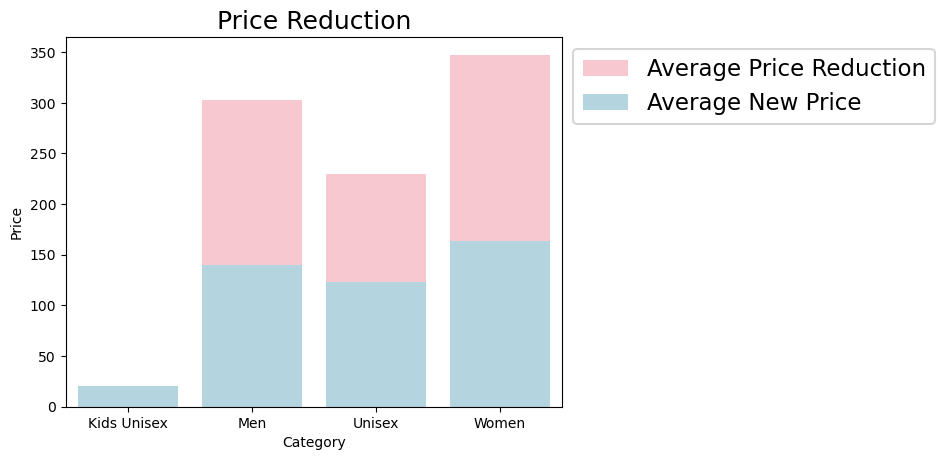

In [30]:
avg_old_price = data.groupby('department')['old_price'].mean().reset_index()
avg_new_price = data.groupby('department')['new_price'].mean().reset_index()
sns.barplot(x="department",  y="old_price", data=avg_old_price, color='pink', label='Average Price Reduction')
sns.barplot(x="department", y="new_price", data=avg_new_price, color='lightblue', label='Average New Price')
sns.set_context("talk")
plt.title('Price Reduction')
plt.xlabel('Category')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

From this histogram, it shows unisex perfume products are not as expensive as male and female ones.

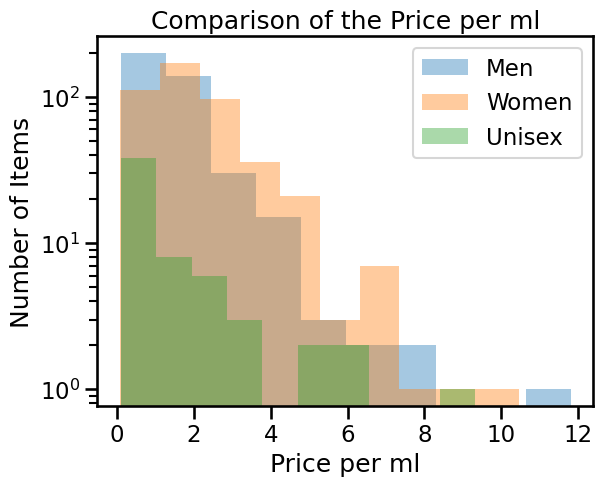

In [31]:
plt.hist(men['price_per_ml'], alpha=0.4, label='Men', density=False)
plt.hist(women['price_per_ml'], alpha=0.4, label='Women', density=False)
plt.hist(unisex['price_per_ml'], alpha=0.4, label='Unisex', density=False)
plt.yscale('log')
plt.xticks(ticks=[0,2,4,6,8,10,12], labels=None)
plt.title('Comparison of the Price per ml')
plt.xlabel('Price per ml')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

From scatter charts, it demonstrates more women perfumes still get 4-5 star reviews, althoght the price is slightly higher.

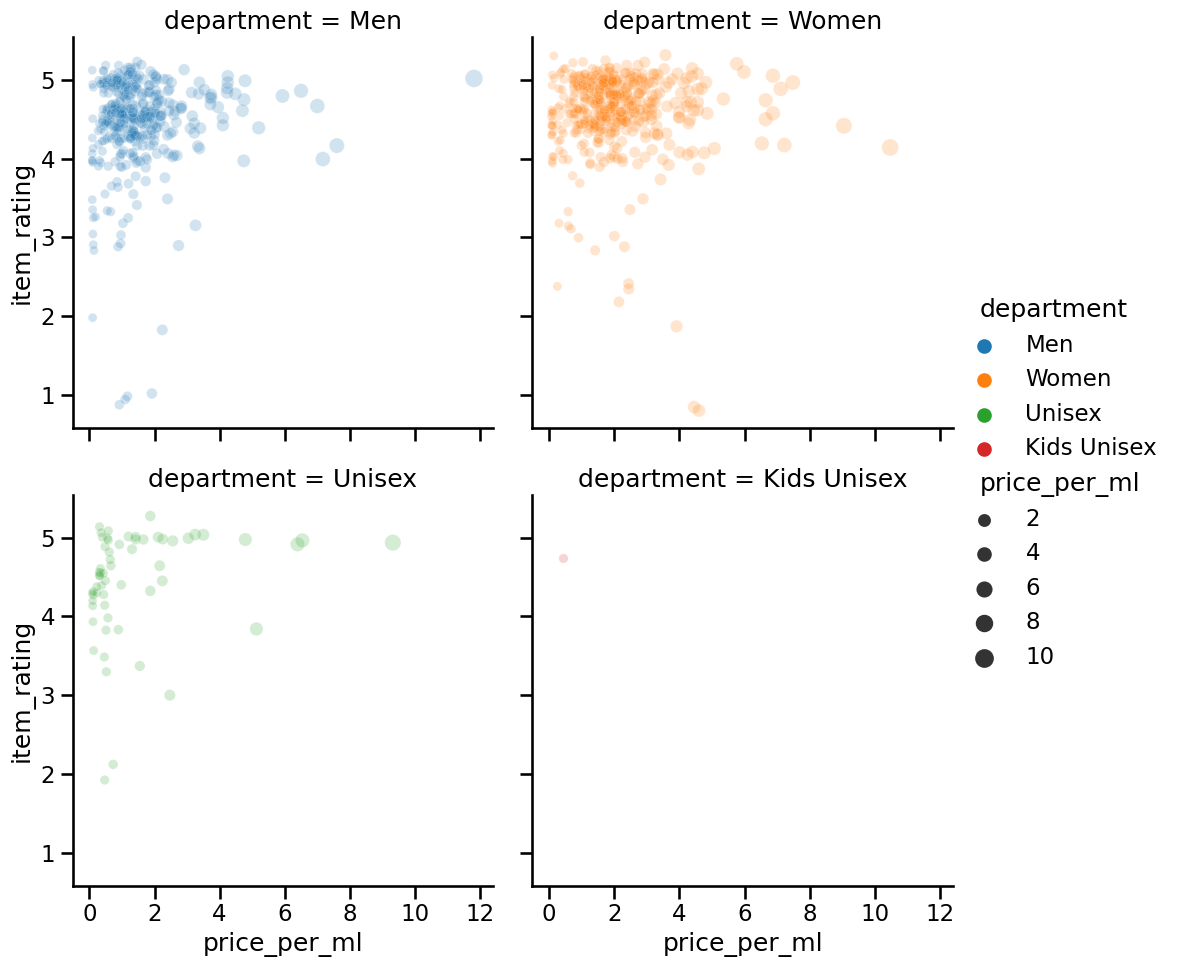

In [32]:
rate_jitter=data['item_rating']+np.random.normal(0,0.1,size=len(data))
sns.relplot(x=data['price_per_ml'], y=rate_jitter, kind='scatter', hue=data['department'], alpha=0.2, size=data['price_per_ml'], col=data['department'], col_wrap=2)
plt.xticks(ticks=[0,2,4,6,8,10,12], labels=None)
plt.show()

In [34]:
from scipy.stats import linregress
from wordcloud import WordCloud, STOPWORDS

In [35]:
regression=linregress(men['price_per_ml'], men['item_rating'])
print(regression)

LinregressResult(slope=0.05024223029124603, intercept=4.389628029396504, rvalue=0.10311156073189065, pvalue=0.04156935453669256, stderr=0.024573424310084333, intercept_stderr=0.04815631963257086)


From the below chart, it tells there is a trend that a product with a higher price would perhaps result a better review. Here only shows a chart for men's perfume

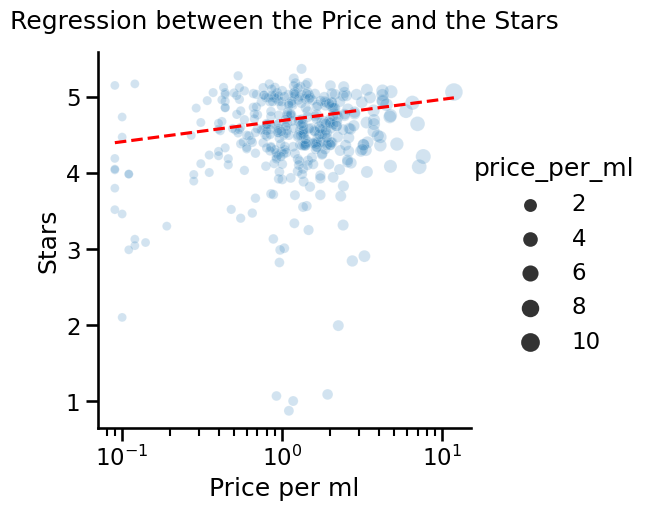

In [36]:
fx=np.array([men['price_per_ml'].min(), men['price_per_ml'].max()])
fy=regression.intercept+regression.slope*fx
rate_jitter_men=men['item_rating']+np.random.normal(0,0.1,size=len(men))
sns.relplot(x=men['price_per_ml'], y=rate_jitter_men, kind='scatter', alpha=0.2, size=men['price_per_ml'])
plt.xticks(ticks=[0,2,4,6,8,10,12], labels=None)
plt.plot(fx, fy, '--', color='red')
plt.xscale("log")
plt.title('Regression between the Price and the Stars', y=1.04)
plt.xlabel('Price per ml')
plt.ylabel('Stars')
plt.show()

In [38]:
regression=linregress(women['price_per_ml'], women['item_rating'])
print(regression)

LinregressResult(slope=-0.011865396332811215, intercept=4.610884594291594, rvalue=-0.03193953692620129, pvalue=0.49867084520282334, stderr=0.017523014937350485, intercept_stderr=0.04362927447215077)


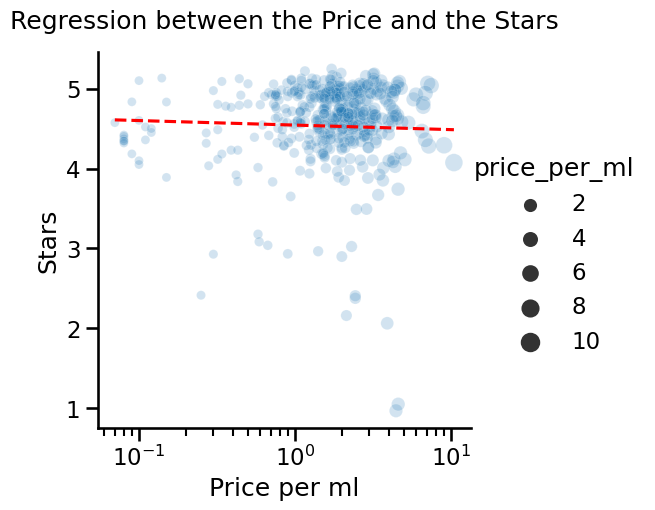

In [39]:
fx=np.array([women['price_per_ml'].min(), women['price_per_ml'].max()])
fy=regression.intercept+regression.slope*fx
rate_jitter_women=women['item_rating']+np.random.normal(0,0.1,size=len(women))
sns.relplot(x=women['price_per_ml'], y=rate_jitter_women, kind='scatter', alpha=0.2, size=women['price_per_ml'])
plt.xticks(ticks=[0,2,4,6,8,10,12], labels=None)
plt.plot(fx, fy, '--', color='red')
plt.xscale("log")
plt.title('Regression between the Price and the Stars', y=1.04)
plt.xlabel('Price per ml')
plt.ylabel('Stars')
plt.show()

This session would show the note preference of different sexual categories. By giving a bar chart in stead of a table, here demonstrates the top 10 scent notes.

In [40]:
men_base_str=men['base_note'].str.cat(sep=' ')
men_middle_str=men['middle_note'].str.cat(sep=' ')
men_str=men_base_str+men_middle_str
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
men_str_nopunc = ""
for word in men_str:
   if word not in punctuations:
       men_str_nopunc = men_str_nopunc + word
men_str_clean_and=men_str_nopunc.replace(' and ', '')
men_str_clean_And=men_str_clean_and.replace(' And ', '')
men_str_cleaned=men_str_clean_And.replace(' Notes ', '')

In [41]:
#define a fuction to count the number of words in a string
def word_count(str):
    counts = {}
    words = str.split()
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    return counts

men_note_lib=word_count(men_str_cleaned)
sort_men = sorted(men_note_lib.items(), key=lambda x: x[1], reverse=True)

#conver a dictionary to a dataframe
men_note_df=pd.DataFrame(men_note_lib.items(), columns=['note', 'frequency'])
men_note_df.sort_values('frequency', ascending=False).head(10)

,note,frequency
11,Amber,107
14,Patchouli,107
17,Cedar,104
13,Sandalwood,103
12,Musk,93
32,Vetiver,82
29,Tonka,72
301,Jasmine,65
30,Bean,59
433,Geranium,56


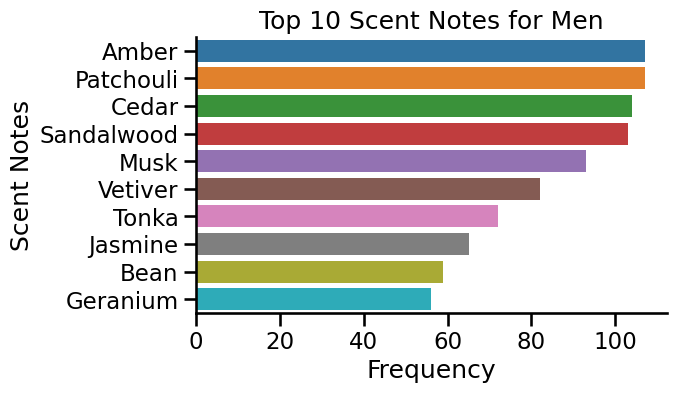

In [42]:
men_note_top10=men_note_df.sort_values('frequency', ascending=False).head(10)
sns.catplot(x='frequency', y='note', data=men_note_top10, kind='bar', height=4, aspect=16/9)
plt.title('Top 10 Scent Notes for Men')
plt.xlabel('Frequency')
plt.ylabel('Scent Notes')
plt.show()

In [43]:
#prepare for the string of women's notes
women_base_str=women['base_note'].str.cat(sep=' ')
women_middle_str=women['middle_note'].str.cat(sep=' ')
women_str=women_base_str+women_middle_str
women_str_nopunc = ""
for word in women_str:
   if word not in punctuations:
       women_str_nopunc = women_str_nopunc + word
women_str_clean_and=women_str_nopunc.replace(' and ', '')
women_str_clean_And=women_str_clean_and.replace(' And ', '')
women_str_cleaned=women_str_clean_And.replace(' Notes ', '')


#display the top 10 scent notes for women
women_note_lib=word_count(women_str_cleaned)
sort_women = sorted(women_note_lib.items(), key=lambda x: x[1], reverse=True)
women_note_df=pd.DataFrame(women_note_lib.items(), columns=['note', 'frequency'])
women_note_df.sort_values('frequency', ascending=False).head(10)

,note,frequency
25,Jasmine,173
9,Musk,171
66,Rose,143
0,Vanilla,125
8,Sandalwood,114
16,Amber,114
12,Patchouli,82
124,Blossom,61
379,Orange,58
10,Cedar,55


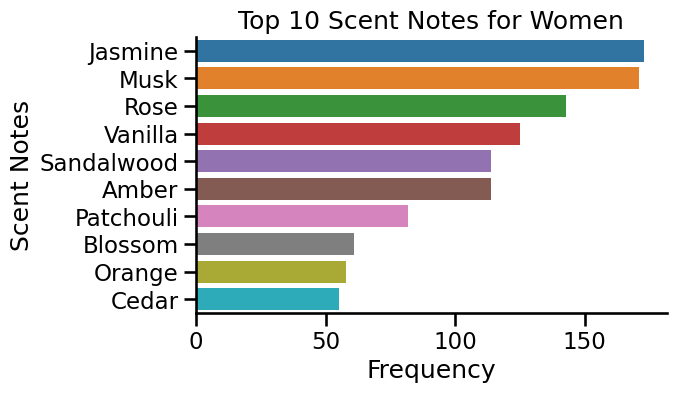

In [44]:
women_note_top10=women_note_df.sort_values('frequency', ascending=False).head(10)
sns.catplot(x='frequency', y='note', data=women_note_top10, kind='bar', height=4, aspect=16/9)
plt.title('Top 10 Scent Notes for Women')
plt.xlabel('Frequency')
plt.ylabel('Scent Notes')
plt.show()

In [45]:
#prepare for the string of unisex's notes
unisex_base_str=unisex['base_note'].str.cat(sep=' ')
unisex_middle_str=unisex['middle_note'].str.cat(sep=' ')
unisex_str=unisex_base_str+unisex_middle_str
unisex_str_nopunc = ""
for word in unisex_str:
   if word not in punctuations:
       unisex_str_nopunc = unisex_str_nopunc + word
unisex_str_clean_and=unisex_str_nopunc.replace(' and ', '')
unisex_str_clean_And=unisex_str_clean_and.replace(' And ', '')
unisex_str_cleaned=unisex_str_clean_And.replace(' Notes ', '')

#display the top 10 scent notes for unisex
unisex_note_lib=word_count(unisex_str_cleaned)
sort_unisex = sorted(unisex_note_lib.items(), key=lambda x: x[1], reverse=True)
unisex_note_df=pd.DataFrame(unisex_note_lib.items(), columns=['note', 'frequency'])
unisex_note_df.sort_values('frequency', ascending=False).head(10)

,note,frequency
5,Amber,22
8,Musk,17
15,Sandalwood,13
9,Vanilla,13
68,Rose,12
104,Jasmine,11
21,Patchouli,10
4,Wood,9
22,Cedar,8
98,Black,6


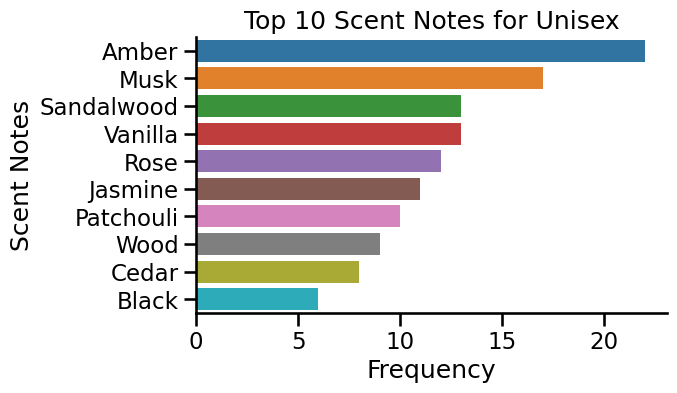

In [46]:
unisex_note_top10=unisex_note_df.sort_values('frequency', ascending=False).head(10)
sns.catplot(x='frequency', y='note', data=unisex_note_top10, kind='bar', height=4, aspect=16/9)
plt.title('Top 10 Scent Notes for Unisex')
plt.xlabel('Frequency')
plt.ylabel('Scent Notes')
plt.show()

Furthermore, in spite of a bar chart, text graphics would look more fnacy. In this way, it is better to have audience's attention.`m

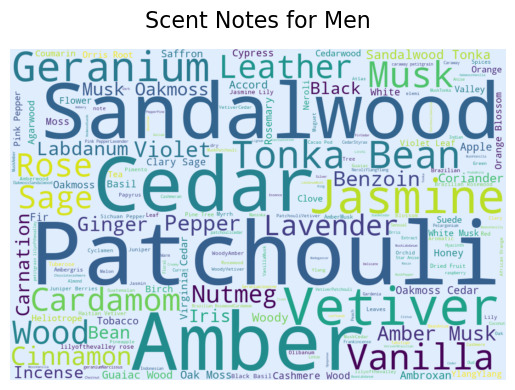

In [48]:
men_wc=WordCloud(background_color='#e0edfd', width=1080, height=720).generate(men_str_cleaned)
plt.imshow(men_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Scent Notes for Men',size=16, y=1.04)
plt.show()

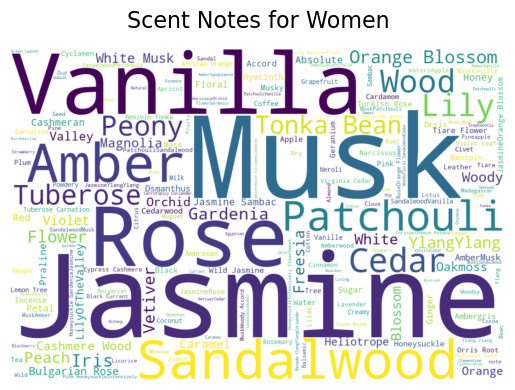

In [49]:
women_wc=WordCloud(background_color='white', width=1080, height=720).generate(women_str_cleaned)
plt.imshow(women_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Scent Notes for Women',size=16, y=1.04)
plt.show()

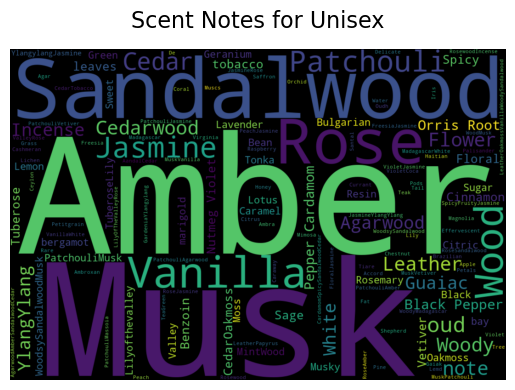

In [50]:
unisex_wc=WordCloud(background_color='#000000', width=1080, height=720).generate(unisex_str_cleaned)
plt.imshow(unisex_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Scent Notes for Unisex',size=16, y=1.04)
plt.show()

# 7. Conclusion
In sum, here are viewpoints as below.

Although there is no big discont for unisex perfumes, unisex perfumes are not as expensive as male and female ones.

More women perfumes with a high price get 4-5 star reviews than man's perfumes.

Top 5 scent notes per category are as below.

Men - Cedar, Amber, Patchouli, Sandalwood, Musk

Women - Jasmine, Musk, Rose, Vanilla, Sandalwood

Unisex - Amber, Musk, Rose, Sandalwood, Vanilla

Suggested further analysis.

Even though this analysis only focus on the general idea of the price and scent notes, the following analysis can change to focus on paritcular brands by the same techniques.

What combination of the scent notes is common for different categories.

Any preference about the perfume concentration or scents reagarding different brands.